In [1]:
import numpy as np
import pulser
from pulser.devices import DigitalAnalogDevice
from pulser.register import Register
from pulser.pulse import Pulse
from pulser.waveforms import BlackmanWaveform

from pulser import Pulse, Sequence, Register
from pulser_simulation import QutipEmulator
from pulser.waveforms import InterpolatedWaveform
from scipy.optimize import minimize
from scipy.spatial.distance import pdist, squareform

import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from source.qubo import anneal, plot_distribution, draw_solutions

import networkx as nx
from pulser.devices import DigitalAnalogDevice, MockDevice

# Maximal Independent Set on Unit Disk Graphs (UDMIS)
Only depends on Rydberg Blocking

## First Example

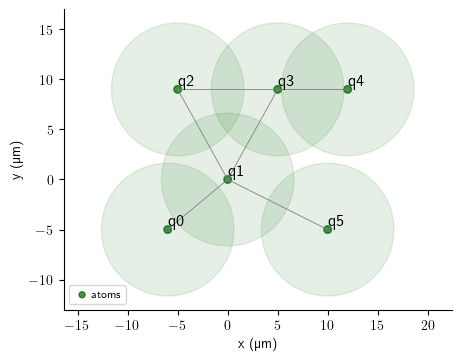

In [23]:
coords = np.array([
    [-6, -5],
    [0, 0],
    [-5, 9],
    [5, 9],
    [12, 9],
    [10, -5],
])

qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
reg = Register(qubits)
reg.draw(
    blockade_radius=DigitalAnalogDevice.rydberg_blockade_radius(1.0),
    draw_graph=True,
    draw_half_radius=True,
)

In [43]:
# We choose a median value between the min and the max
# Omega = np.median(Q[Q > 0].flatten())
# Omega = np.median(Q[Q > 1e-3].flatten())
# Omega = 2.
Omega = 1.5*np.pi * 1000./T
delta_0 = -4.  # just has to be negative
delta_f = -delta_0  # just has to be positive
T = 5_000  # time in ns, we choose a time long enough to ensure the propagation of information in the system

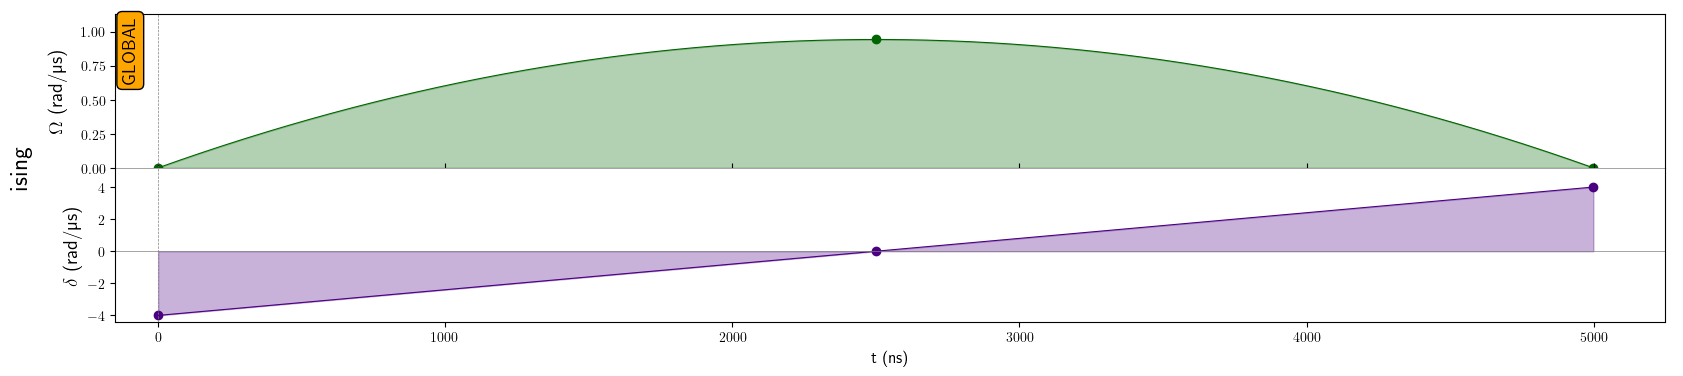

In [44]:
adiabatic_pulse = Pulse(
    InterpolatedWaveform(T, [1e-9, Omega, 1e-9]),
    InterpolatedWaveform(T, [delta_0, 0, delta_f]),
    0,
)
seq = Sequence(reg, DigitalAnalogDevice)
seq.declare_channel("ising", "rydberg_global")
seq.add(adiabatic_pulse, "ising")
seq.draw()

In [45]:
simul = QutipEmulator.from_sequence(seq)
results = simul.run()
final = results.get_final_state()
count_dict = results.sample_final_state()

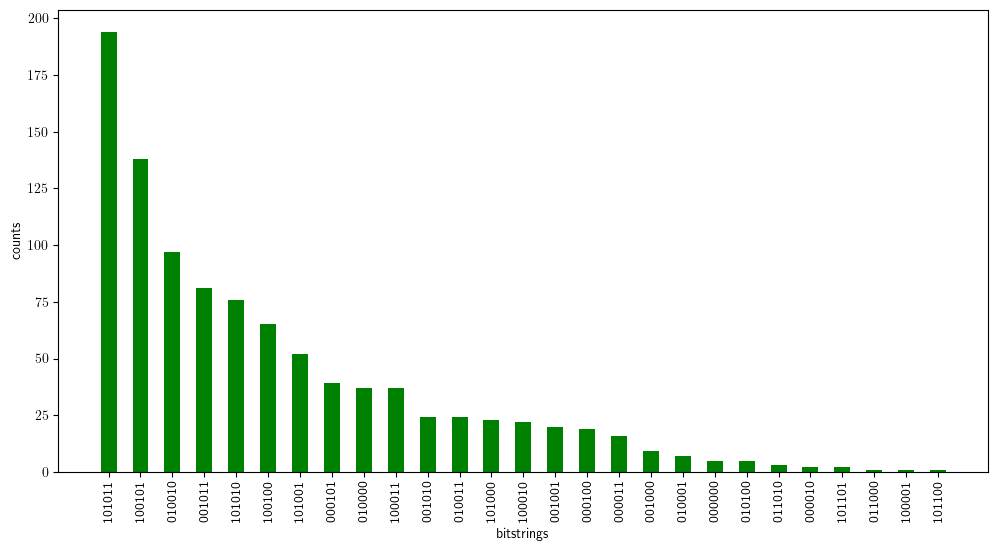

In [46]:
def plot_distribution(C, sols=[]):
    C = dict(sorted(C.items(), key=lambda item: item[1], reverse=True))
    color_dict = {key: "r" if key in sols else "g" for key in C}
    plt.figure(figsize=(12, 6))
    plt.xlabel("bitstrings")
    plt.ylabel("counts")
    plt.bar(C.keys(), C.values(), width=0.5, color=color_dict.values())
    plt.xticks(rotation="vertical")
    plt.show()

plot_distribution(count_dict)

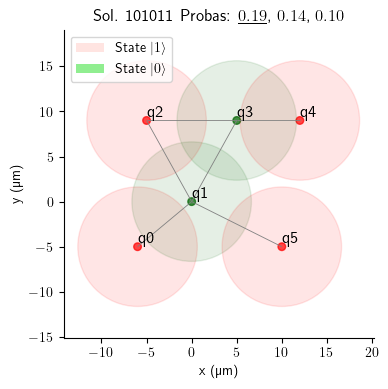

In [47]:
draw_solutions(
    reg,
    count_dict,
    n=1,
    draw_graph=True,
)

## More Graphs

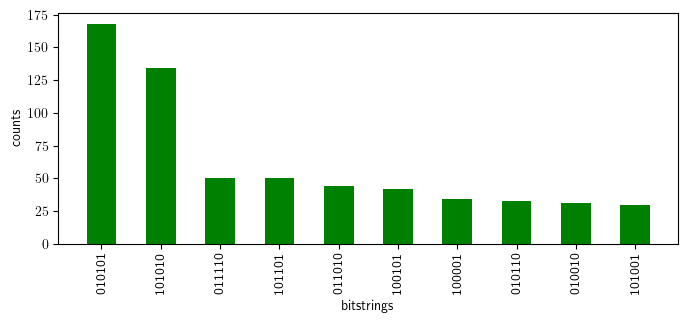

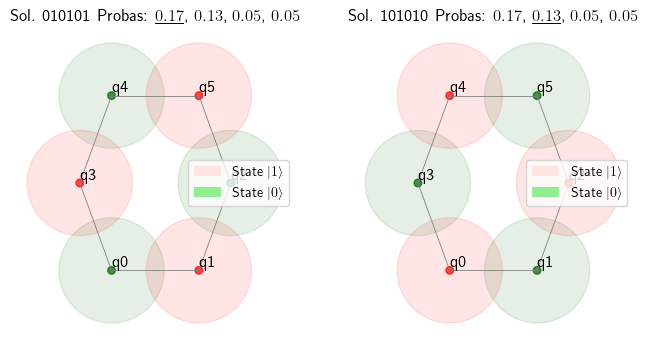

In [48]:
coords = [
    [-0, 0], 
    [11, 0], 
    [15, 11],
    [-4, 11], 
    [-0, 22], 
    [11, 22], 
    ]
qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
reg = Register(qubits)

T = 5000
Omega = 1.5*np.pi * 1000./T
delta_i = -4.
delta_f = -delta_i
counts = anneal(reg, Omega, delta_i, delta_f, T=T, draw_distribution=True)
draw_solutions(reg, counts, n=2, draw_graph=True)

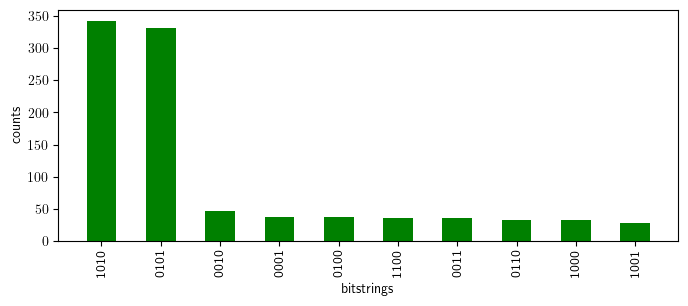

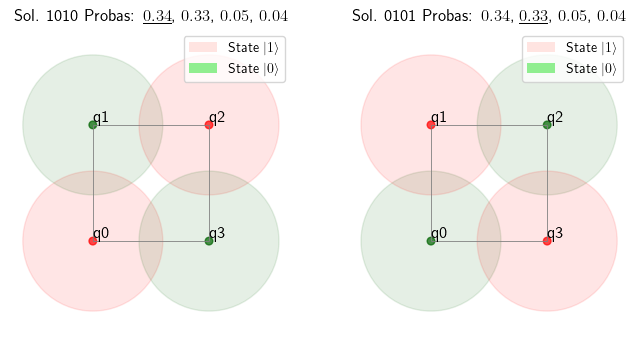

In [50]:
coords = [[-0, -11], [-0, 0], [11, 0], [11, -11]]
qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
reg = Register(qubits)

T = 5000
Omega = 1.5*np.pi * 1000./T
delta_i = -4.
delta_f = -delta_i
counts = anneal(reg, Omega, delta_i, delta_f, T=T, draw_distribution=True)
draw_solutions(reg, counts, n=2, draw_graph=True)

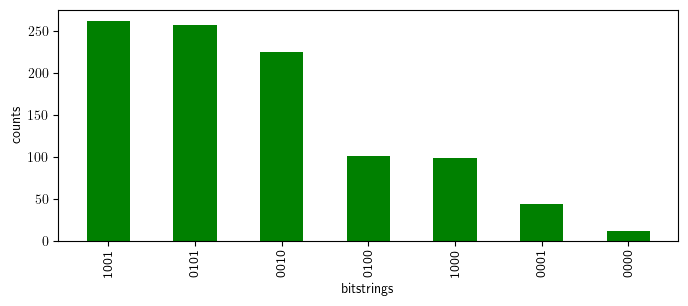

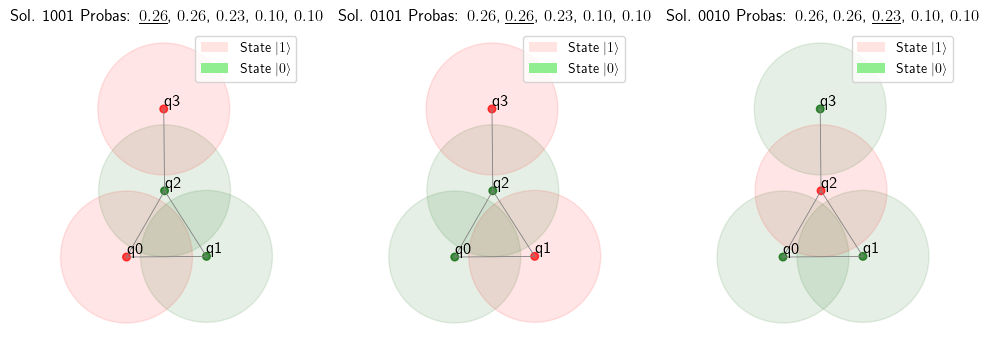

In [52]:
qubits = {
  "q0": (-1.6666664123535155, 0.0666656494140625),
  "q1": (6.366546024142858, 0.13553528612314714),
  "q2": (2.155397489224712, 6.724032097660272),
  "q3": (2.0729086582155096, 14.940739367135642),
}
reg = Register(qubits)

T = 5000
Omega = 1.5*np.pi * 1000./T
delta_i = -4.
delta_f = -delta_i
counts = anneal(reg, Omega, delta_i, delta_f, draw_distribution=True, T=T, device=MockDevice)
draw_solutions(reg, counts, n=3, device=MockDevice, draw_graph=True)

## Extension: With Quantum Wire

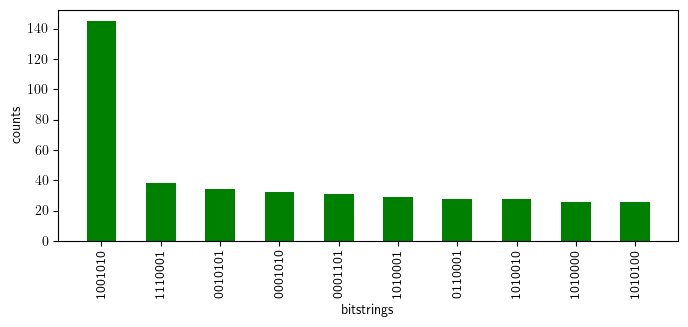

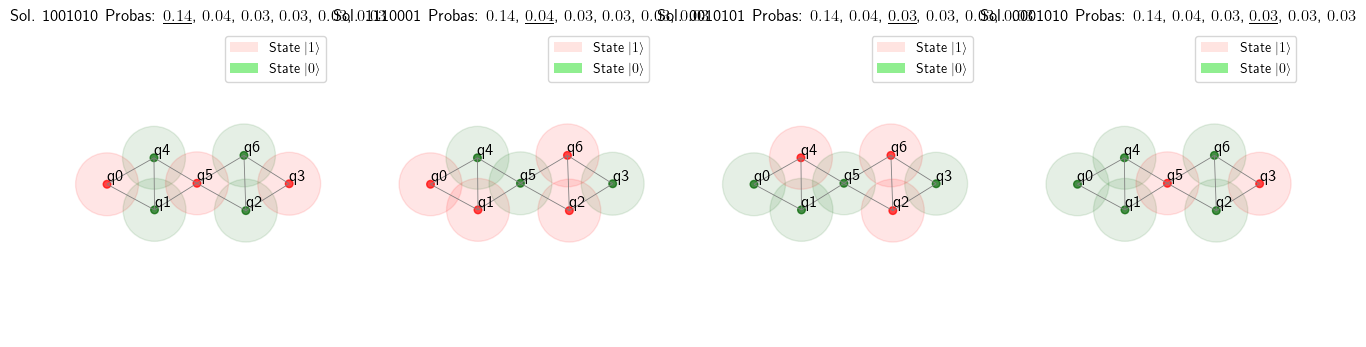

In [54]:
qubits = {
  "q0": (-14.931860477537565, 3.5919953897730017),
  "q1": (-4.922267346720883, -1.8084645434126823),
  "q2": (14.330896556039722, -1.9631704585850813),
  "q3": (23.46599511771361, 3.701546341073506),
  "q4": (-5.037686829948207, 9.173243074145235),
  "q5": (4.025418108932725, 3.797038768926197),
  "q6": (13.93072219099169, 9.68147070735476),
}

reg = Register(qubits)

T = 5000
Omega = 1.5*np.pi * 1000./T
delta_i = -4.
delta_f = -delta_i

counts = anneal(reg, Omega, delta_i, draw_distribution=True, T=T, device=MockDevice)
draw_solutions(reg, counts, n=4, device=MockDevice, draw_graph=True)

What if we want to connect q0 and q3 now? Clearly this does not work in this graph

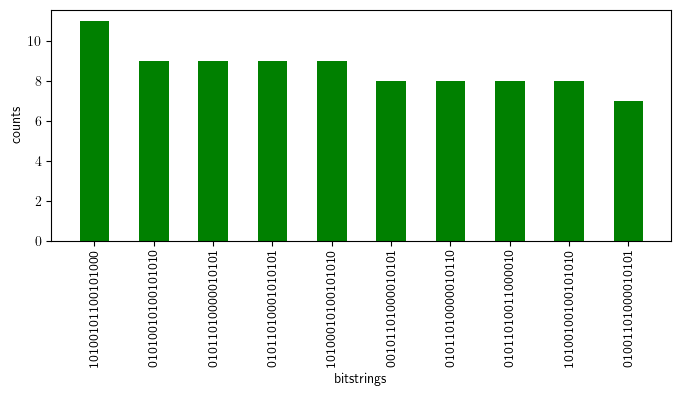

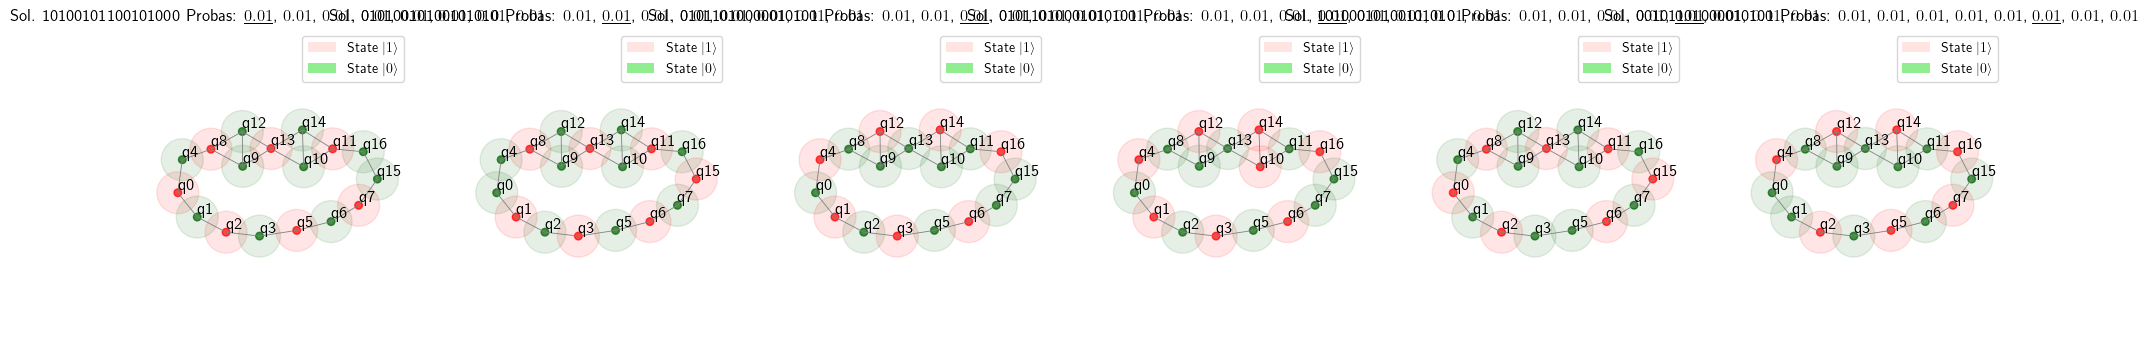

In [56]:
qubits = {
  "q0": (-25.387295731369353, -10.153056807984125),
  "q1": (-19.25678867100936, -17.819220496098218),
  "q2": (-10.159039179030298, -22.602725578826107),
  "q3": (0.39523733308320175, -23.832881653036143),
  "q4": (-23.979781167038038, 0.2770965527023339),
  "q5": (12.131649962643147, -22.035765440303607),
  "q6": (22.96952609636893, -19.256380600698705),
  "q7": (31.670520483667204, -14.108194465717416),
  "q8": (-14.931860477537565, 3.5919953897730017),
  "q9": (-4.922267346720883, -1.8084645434126823),
  "q10": (14.330896556039722, -1.9631704585850813),
  "q11": (23.46599511771361, 3.701546341073506),
  "q12": (-5.037686829948207, 9.173243074145235),
  "q13": (4.025418108932725, 3.797038768926197),
  "q14": (13.93072219099169, 9.68147070735476),
  "q15": (37.59259508362564, -5.828987876457357),
  "q16": (33.14645852495739, 2.789081327926916),
}

reg = Register(qubits)

delta_i = -3
T = 4000
Omega = 1.5*np.pi * 1000./T

counts = anneal(reg, Omega, delta_i, delta_f, draw_distribution=True, T=T, device=MockDevice)
draw_solutions(reg, counts, n=6, device=MockDevice, draw_graph=True)

We want the star graph. Not possible without wires.

Somehow I have to turn the $\delta_i$ rather high here.

The point is that in the figure below, we want to build a, but b also connects all the vertices on the outside. c fixes this.
The solution is [0111111], so all except the middle vertex.

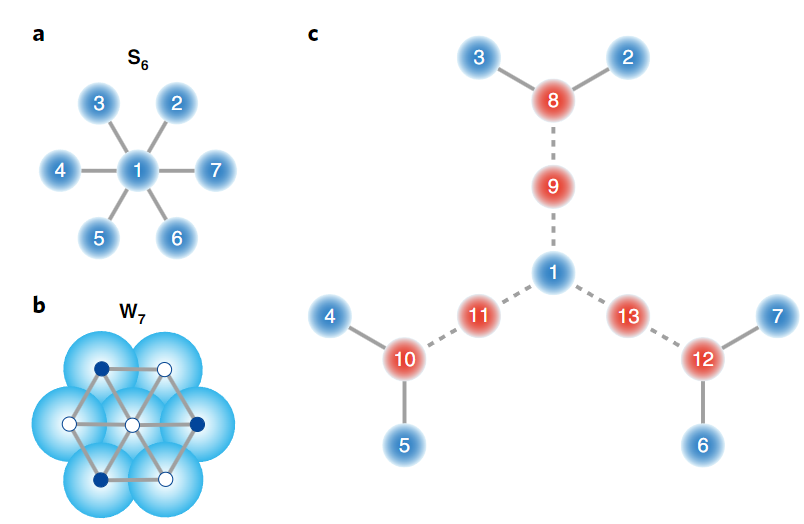

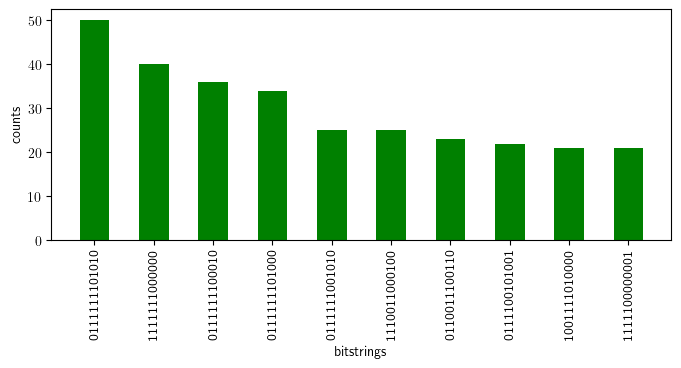

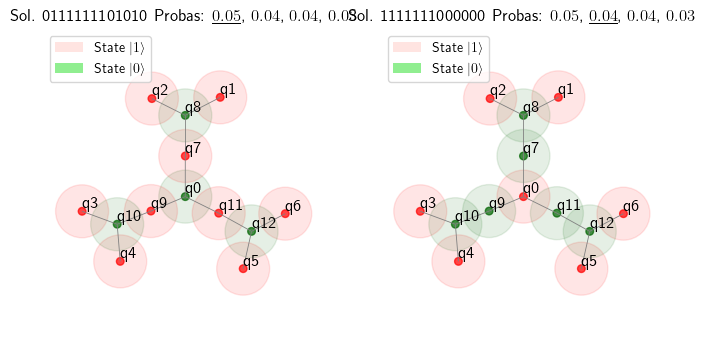

In [71]:
qubits = {
  "q0": (0, 0),
  "q1": (8.735617163072948, 24.827028293947173),
  "q2": (-8.342495165204053, 24.51335255897444),
  "q3": (-25.80389339286783, -3.664247050218374),
  "q4": (-16.26459024904507, -16.18735363376267),
  "q5": (14.476242806075025, -18.010818773220524),
  "q6": (24.997440014509888, -4.264796493670645),
  "q7": (-0.0014645830325186182, 10.157557980311985),
  "q8": (-0.0014645830325186182, 20.31511596062397),
  "q9": (-8.584718756353446, -3.610310331307195),
  "q10": (-17.029355531229335, -6.897539807332539),
  "q11": (8.357497754864577, -4.137473403197489),
  "q12": (16.56884517447057, -8.686198085183772),
}
reg = Register(qubits)

delta_i = -3
delta_f = -delta_i
T = 4000
Omega = 1.5*np.pi * 1000./T

counts = anneal(reg, Omega, delta_i, delta_f, draw_distribution=True, T=T, device=MockDevice)
draw_solutions(reg, counts, n=2, device=MockDevice, draw_graph=True)

